In [1]:
import os
import scipy
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
np.random.seed(42)

<h1>Importing the Dataset:

In [2]:
%%time
wakeCounty = pd.read_csv("WakeCountyHousing.csv")
wakeCounty = wakeCounty[['Real_Estate_Id','Deeded_Acreage','Year_of_Sale','Physical_Zip',
                         'Year_Built','Physical_City','Total_Sale_Date','Month_Year_of_Sale',
                         'Year_Remodeled','Heated_Area','Num_Stories','Design_Style','Bath',
                         'Utilities','Total_Sale_Price']]
wakeCounty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308292 entries, 0 to 308291
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Real_Estate_Id      308292 non-null  int64  
 1   Deeded_Acreage      308292 non-null  float64
 2   Year_of_Sale        308292 non-null  int64  
 3   Physical_Zip        308146 non-null  float64
 4   Year_Built          308292 non-null  int64  
 5   Physical_City       308183 non-null  object 
 6   Total_Sale_Date     308292 non-null  object 
 7   Month_Year_of_Sale  308292 non-null  object 
 8   Year_Remodeled      308292 non-null  int64  
 9   Heated_Area         308292 non-null  int64  
 10  Num_Stories         308292 non-null  object 
 11  Design_Style        308292 non-null  object 
 12  Bath                308275 non-null  object 
 13  Utilities           306324 non-null  object 
 14  Total_Sale_Price    308292 non-null  int64  
dtypes: float64(2), int64(6), object(7)

<h1>Cleaning the Data and Data Preparation:

In [3]:
#Dropping all the columns that have NaN as a part of them
wakeCounty = wakeCounty.dropna()

In [4]:
wakeCounty = wakeCounty.drop(['Month_Year_of_Sale','Total_Sale_Date','Design_Style',
                              'Real_Estate_Id','Physical_City','Total_Sale_Date','Month_Year_of_Sale',
                              'Heated_Area','Design_Style','Utilities'], axis=1)

In [5]:
num_stories_cat = wakeCounty[["Num_Stories"]]
ordinal_encoder = OrdinalEncoder()
num_stories_cat_encoded = ordinal_encoder.fit_transform(num_stories_cat)
wakeCounty = wakeCounty.drop(['Num_Stories'], axis=1)
wakeCounty["Num_Stories_cat"] = num_stories_cat_encoded

wakeCounty['Bath'] = wakeCounty['Bath'].replace(['2 Bath'],2)
wakeCounty['Bath'] = wakeCounty['Bath'].replace(['1 Bath'],1)
wakeCounty['Bath'] = wakeCounty['Bath'].replace(['Other'],0)
wakeCounty['Bath'] = wakeCounty['Bath'].replace(['3 Bath'],3)
wakeCounty['Bath'] = wakeCounty['Bath'].replace(['3½ Bath'],3.5)
wakeCounty['Bath'] = wakeCounty['Bath'].replace(['1 ½ Bath'],1.5)
wakeCounty['Bath'] = wakeCounty['Bath'].replace(['2½ Bath'],2.5)

In [6]:
def findCat(row):
    if row['Total_Sale_Price'] <= 100000:
        return "<100000"
    elif row['Total_Sale_Price'] <= 200000:
        return "100000-200000"
    elif row['Total_Sale_Price'] <= 300000:
        return "200000-300000"
    elif row['Total_Sale_Price'] <= 400000:
        return "300000-400000"
    else:
        return ">400000"
wakeCounty['Total_Sale_Price_Cat'] = wakeCounty.apply(lambda row: findCat(row), axis=1)

In [7]:
wakeCounty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306161 entries, 0 to 308291
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Deeded_Acreage        306161 non-null  float64
 1   Year_of_Sale          306161 non-null  int64  
 2   Physical_Zip          306161 non-null  float64
 3   Year_Built            306161 non-null  int64  
 4   Year_Remodeled        306161 non-null  int64  
 5   Bath                  306161 non-null  float64
 6   Total_Sale_Price      306161 non-null  int64  
 7   Num_Stories_cat       306161 non-null  float64
 8   Total_Sale_Price_Cat  306161 non-null  object 
dtypes: float64(4), int64(4), object(1)
memory usage: 23.4+ MB


<h1>Splitting into Test and Training Data:

In [8]:
X_train, X_test, y_train, y_test = train_test_split(wakeCounty.drop(["Total_Sale_Price_Cat","Total_Sale_Price"], axis=1), 
                                                    wakeCounty["Total_Sale_Price_Cat"], test_size=0.3, random_state=42)
X_train = X_train[:1000]
y_train = y_train[:1000]
X_test = X_test[:400]
y_test = y_test[:400]

<h1>SGD Classifier:

In [9]:
SGDmodel = SGDClassifier(random_state=42, max_iter=100)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
SGDmodel_results = cross_val_score(SGDmodel, X_train, y_train, cv=kfold, scoring='accuracy')

/Users/saakethkoka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/saakethkoka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/saakethkoka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/saakethkoka/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:

In [10]:
SGDmodel_results.mean()

0.215

<h1>Random Forest Classifier:

In [11]:
RFCmodel = RandomForestClassifier(n_estimators=20)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
RFCmodel_results = cross_val_score(RFCmodel, X_train, y_train, cv=kfold, scoring='accuracy')

In [12]:
RFCmodel_results.mean()

0.57

<h1>Random Forest Confusion Matrix:

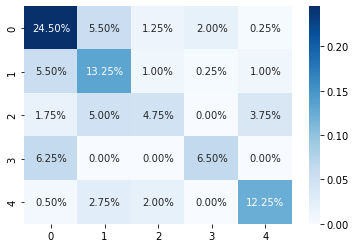

In [13]:
RFCmodel = RandomForestClassifier(n_estimators=20)

RFCmodel.fit(X_train, y_train)

y_pred = RFCmodel.predict(X_test)

cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

<h1>K Neighbors Classifier:

In [14]:
KNCmodel = KNeighborsClassifier(n_neighbors=9)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
KNCmodel_results = cross_val_score(KNCmodel, X_train, y_train, cv=kfold, scoring='accuracy')

In [15]:
KNCmodel_results.mean()

0.43499999999999994

<h1>K Neighbors Classifier on an ROC curve:

In [16]:
KNCmodel = KNeighborsClassifier(n_neighbors=9)
KNCmodel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [17]:
KNCmodel_predict = KNCmodel.predict(X_test)

In [18]:
KNCmodel_predict

array(['200000-300000', '100000-200000', '100000-200000', '100000-200000',
       '300000-400000', '100000-200000', '100000-200000', '100000-200000',
       '>400000', '100000-200000', '200000-300000', '200000-300000',
       '>400000', '200000-300000', '100000-200000', '100000-200000',
       '>400000', '>400000', '100000-200000', '300000-400000',
       '200000-300000', '100000-200000', '300000-400000', '200000-300000',
       '>400000', '300000-400000', '200000-300000', '>400000', '>400000',
       '100000-200000', '<100000', '100000-200000', '100000-200000',
       '100000-200000', '>400000', '>400000', '>400000', '>400000',
       '>400000', '100000-200000', '200000-300000', '100000-200000',
       '100000-200000', '100000-200000', '>400000', '>400000',
       '100000-200000', '200000-300000', '100000-200000', '100000-200000',
       '100000-200000', '<100000', '300000-400000', '100000-200000',
       '100000-200000', '100000-200000', '100000-200000', '100000-200000',
       '>400

In [19]:
# convert all items in KNCmodel_predict to 1 or 0:
KNCmodel_predict = np.where(KNCmodel_predict == "100000-200000", 1, 0)

In [20]:
y_test = np.where(y_test == "100000-200000", 1, 0)

In [21]:
KNCmodel_predict

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

0.6330658736393222


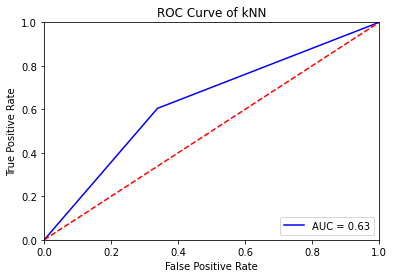

In [22]:

fpr, tpr, threshold = roc_curve(y_test, KNCmodel_predict)
roc_auc = auc(fpr, tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [23]:
OvRmodel = OneVsRestClassifier(SVC())
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
OvRmodel_results = cross_val_score(OvRmodel, X_train, y_train, cv=kfold, scoring='accuracy')

In [24]:
OvRmodel_results.mean()

0.259